<a href="https://www.kaggle.com/code/annavidiella/wine-clustering-with-k-means-pca?scriptVersionId=162613334" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Wine Clustering with K-means & PCA

In this project, I aim to classify different wines from the [Wine Dataset For Clustering](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering/code) based on their chemical constituents. For this purpose, PCA will be employed to reduce the feature space, followed by K-means clustering.

## Load libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Importing data

In [2]:
data = pd.read_csv("/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv")

## Data exploration

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Data preparation

In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.duplicated().any()

False

## Exploration of relation between data features

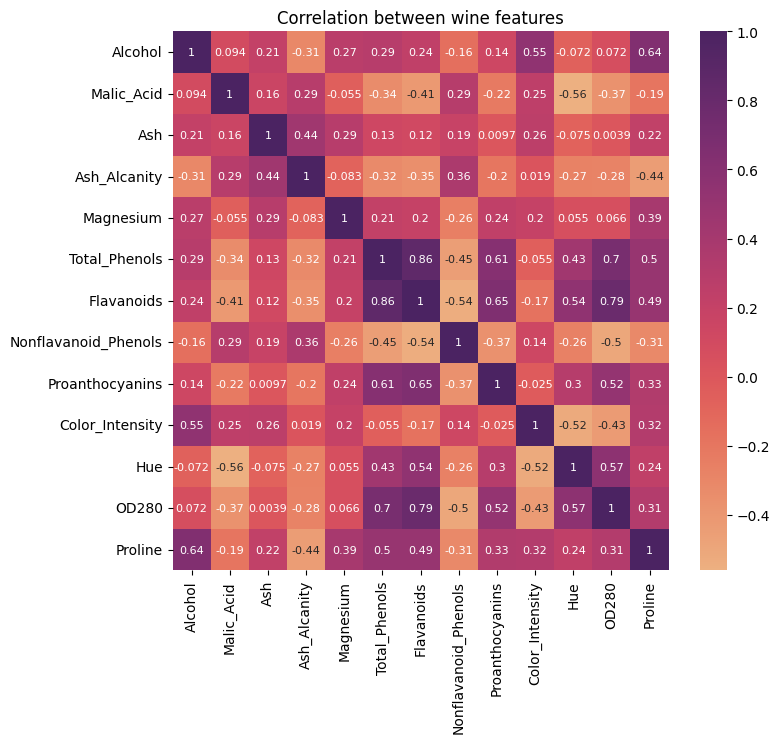

In [8]:
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(), annot=True, annot_kws={"fontsize":8}, cmap="flare")
plt.title("Correlation between wine features")
plt.show()

## Scale features

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

## PCA

I am choosing two components to work with two dimensions.

In [10]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
scores_pca = pca.transform(scaled_data)

## Number of clusters

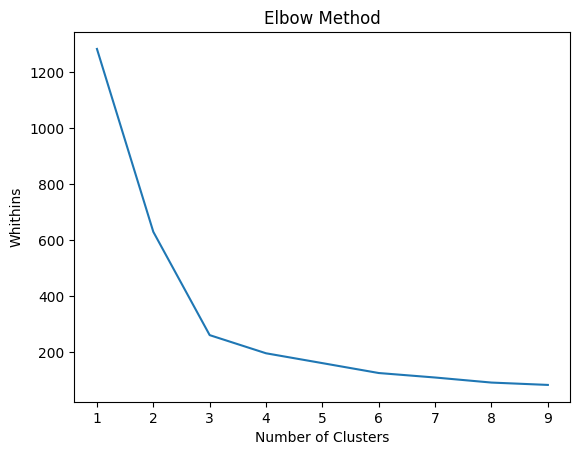

In [11]:
whithins = []


for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init="auto", random_state=42)
    kmeans.fit(scores_pca)
    whithins.append(kmeans.inertia_)
    

plt.plot(range(1,10), whithins)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Whithins")
plt.show()

As per the results obtained with the elbow method, the most optimal number of clusters is 3.

## K-means

In [12]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init="auto", random_state=42)
kmeans.fit(scores_pca)

kmeans_df = pd.DataFrame(scores_pca)
kmeans_df.columns = ["Component 1", "Component 2"]
kmeans_df["Cluster"] =  kmeans.labels_
kmeans_df.head()

,Component 1,Component 2,Cluster
0,3.316751,-1.443463,2
1,2.209465,0.333393,2
2,2.516740,-1.031151,2
3,3.757066,-2.756372,2
4,1.008908,-0.869831,2


## Results

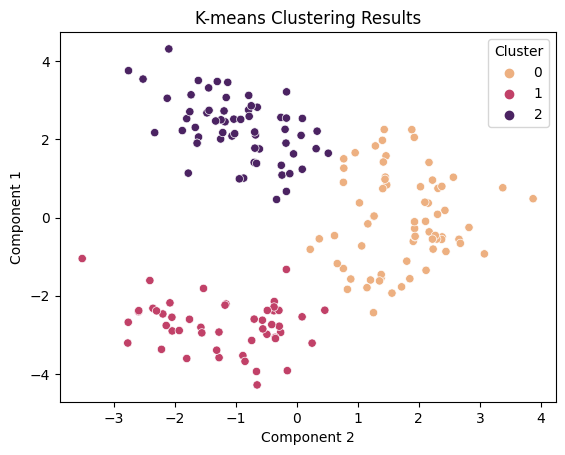

In [13]:
sns.scatterplot(x=kmeans_df["Component 2"], y=kmeans_df["Component 1"], hue=kmeans_df["Cluster"], palette="flare")
plt.title("K-means Clustering Results")
plt.show()